In [1]:
%cd 'Q:\Dropbox\python\QSim\'

Q:\Dropbox\python\QSim


In [2]:
%matplotlib inline
from scipy.io import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [15]:
dim = [64,64]
X = np.mgrid[0:dim[0], 0:dim[1]].astype(np.float64)

X1 = np.array(X)
ar = 8**2
h = np.exp(-((X[0]-dim[0]/2)**2 + (X[1]-dim[1]/2)**2)/ar)*np.pi/4

X1[0] = (X[0]-dim[0]/2)*np.cos(h) - (X[1]-dim[1]/2)*np.sin(h) + dim[0]/2
X1[1] = (X[0]-dim[0]/2)*np.sin(h) + (X[1]-dim[1]/2)*np.cos(h) + dim[1]/2



In [16]:
def jac(X):
    dim = X.shape
    J = [np.roll(X,-1,j) - np.roll(X,1,j) for j in [1,2]]
    J[0][0,0,:] += dim[1]
    J[0][0,dim[1]-1,:] += dim[1]
    J[1][1,:,0] += dim[2]
    J[1][1,:,dim[2]-1] += dim[2]
    return J

In [17]:
J = jac(X)
J1 = jac(X1)

In [18]:
b = np.sum([(X1-X)*(J1[i]+J[i])-(J1[i]-J[i])*(X1-X)*0.5 for i in [0,1]],0)

A = [2*(J1[i]+J[i]) for i in [0,1]]
detA = A[0][0]*A[1][1] - A[1][0]*A[0][1]

A1 = [[A[1][1]/detA,-A[0][1]/detA],[-A[1][0]/detA, A[0][0]/detA]]

x = [np.sum([A1[j][i]*b[j] for j in [0,1]],0) for i in [0,1]]

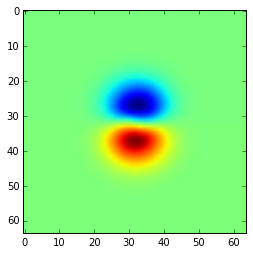

In [21]:
plt.imshow(x[1])

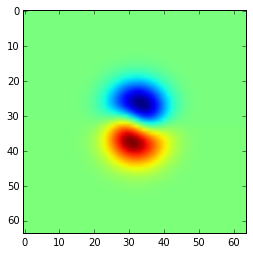

In [29]:
plt.imshow(X1[1]-X[1])

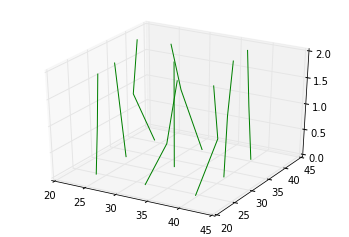

In [103]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(24,41,8):
    for j in range(24,41,8):
        ax.plot([X[0][i,j],x[0][i,j],X1[0][i,j]],[X[1][i,j],x[1][i,j],X1[1][i,j]],[0,1,2], color = 'green')
plt.show()